In [1]:
from unravel import *
import networkx as nx
import matplotlib.pyplot as plt
import pyreadr
import time

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.


In [2]:
train_normal_path = 'TEP2017R/TEP_FaultFree_Training.RData'
train_faulty_path =  'TEP2017R/TEP_Faulty_Training.RData'
 
test_normal_path = 'TEP2017R/TEP_FaultFree_Testing.RData'
test_faulty_path = 'TEP2017R/TEP_Faulty_Testing.RData'
 
train_normal = pyreadr.read_r(train_normal_path)['fault_free_training']
train_faulty = pyreadr.read_r(train_faulty_path)['faulty_training']
test_normal = pyreadr.read_r(test_normal_path)['fault_free_testing']
test_faulty = pyreadr.read_r(test_faulty_path)['faulty_testing']
df_train_normal = train_normal[train_normal.simulationRun==1].iloc[:,3:]
print(df_train_normal.shape)

#SAM took 40 mins???
algorithms = [ cdt.causality.graph.CAM() # 2 mins
             , cdt.causality.graph.CCDr()
             , cdt.causality.graph.GES()
             , cdt.causality.graph.GIES()
             , cdt.causality.graph.LiNGAM()
             , cdt.causality.graph.PC()]
 #            , cdt.causality.graph.SAM(nruns=1)
 #            , cdt.causality.graph.SAMv1(nruns=1) ]

(500, 52)


In [7]:
df_train_normal

,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,xmeas_8,xmeas_9,xmeas_10,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,74.863,120.41,0.33818,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,75.000,120.41,0.33620,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,74.771,120.42,0.33563,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,75.224,120.39,0.33553,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,75.388,120.39,0.32632,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.24602,3651.9,4504.4,9.4721,26.600,42.312,2707.2,74.623,120.40,0.32381,...,54.132,23.663,59.588,22.481,38.952,33.489,45.203,49.900,41.057,16.448
496,0.23457,3663.0,4529.5,9.3440,26.872,42.434,2704.1,75.123,120.40,0.35454,...,54.028,22.776,60.566,22.237,42.978,38.017,42.637,50.075,41.339,17.435
497,0.23068,3656.4,4493.0,9.2978,26.920,42.536,2700.3,74.942,120.39,0.35859,...,54.465,23.158,62.102,21.639,42.483,41.016,46.782,50.098,41.277,18.315
498,0.24263,3632.5,4521.5,9.3915,26.956,42.317,2701.9,74.900,120.37,0.34057,...,54.532,23.386,63.164,22.661,39.558,37.892,47.468,50.312,40.557,19.198


In [8]:
g = algorithms[1].predict(df_train_normal)
gplint(g)
plt.show()

graph.html


AttributeError: 'NoneType' object has no attribute 'render'

algorithm: CAM
time elpased: 124.09391856193542
algorithm: CCDr
time elpased: 3.456944704055786
algorithm: GES
time elpased: 1.9384286403656006
algorithm: GIES
time elpased: 2.0560598373413086
algorithm: LiNGAM
time elpased: 2.8737375736236572
algorithm: PC
time elpased: 4.373522043228149


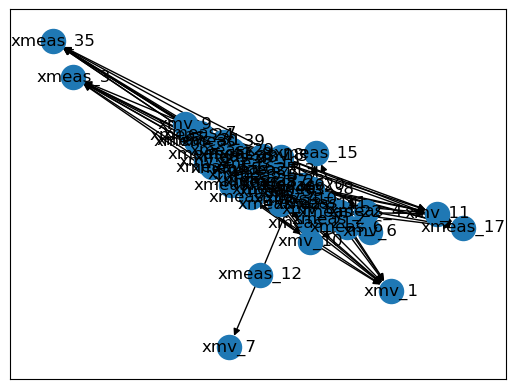

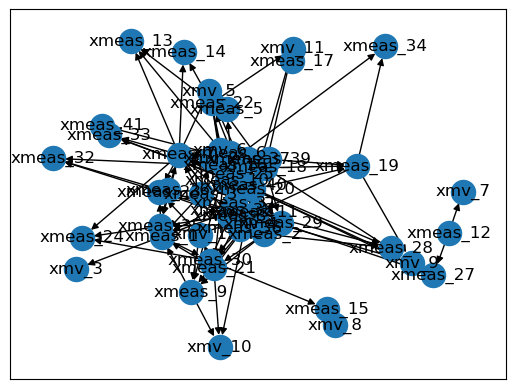

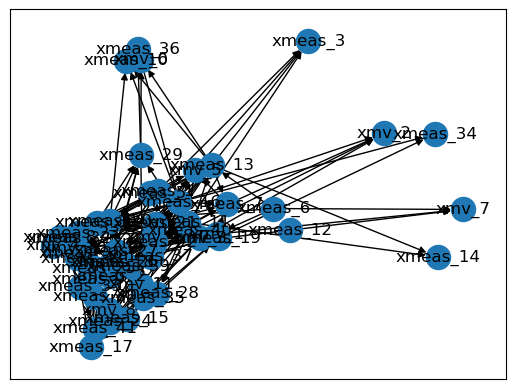

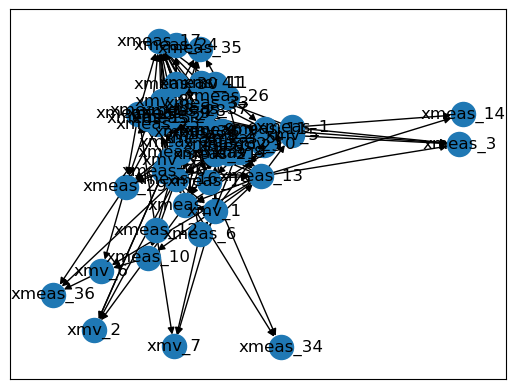

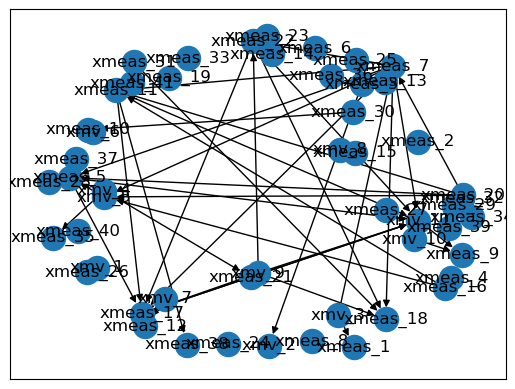

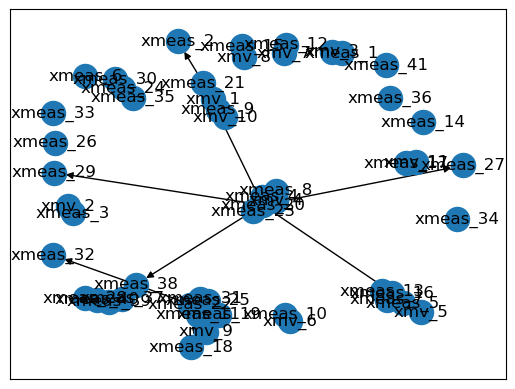

In [9]:
#g = algorithms[1].predict(df_train_normal)
#gplint(g)
#plt.show()
%matplotlib inline

nalgo = len(algorithms)
for i in range(nalgo):
    algo = str(algorithms[i]).split(sep='.')[3]
    print("algorithm:", algo)
    start = time.time()
    g = algorithms[i].predict(df_train_normal)
    end = time.time()
    print("time elpased:", end - start)
    plt.figure(algo)
    nx.draw_networkx(g, with_labels=True)
plt.show()
